## Price prediction using Facebook Prophet


## Importing Necessary Libraries

- **Pandas**: Used for data manipulation and analysis.
- **fbprophet**: A library developed by Facebook for time series forecasting.
- **plotly**: A library for interactive data visualization.
- **yfinance**: A library to fetch financial data from Yahoo Finance.


In [1]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
import yfinance as yf


## Importing the Dataset & Exploring it

Before we proceed with the forecasting, we need to import the dataset. In this notebook, we are fetching financial data directly from Yahoo Finance using the `yfinance` library. After fetching the data, we'll take some preliminary steps to explore and clean it.

In [3]:
# Download data from Yahoo Finance
ticker = input("Enter the ticker symbol: ")
data = yf.download(ticker, period="max", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [4]:
# drop all columns except Close
data = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
data

,Close
Date,
2015-01-26,12.200000
2015-01-27,12.320000
2015-01-28,12.100000
2015-01-29,12.300000
2015-01-30,11.670000
...,...
2023-08-29,18.080000
2023-08-30,17.860001
2023-08-31,17.219999


In [5]:
# reset the index
data = data.reset_index()

In [6]:
# note for fbprophet the price data must be a float
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2168 non-null   datetime64[ns]
 1   Close   2168 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.0 KB


In [7]:
# Generate statistical summary of the dataset
data.describe()

,Close
count,2168.000000
mean,10.607726
std,3.072071
min,6.700000
25%,8.350000
50%,9.310000
75%,12.125000
max,20.370001


# Data Visualization

Visualizing data is a crucial step in any data analysis process. It helps in understanding the underlying patterns in the data. In this section, we'll use Plotly to create some interactive visualizations to get a better sense of our dataset.

In [8]:
# list of columns
data.columns

Index(['Date', 'Close'], dtype='object')

In [9]:
# Area graph (Date Vs Price) using Plotly Express
px.area(data, x='Date', y="Close")

In [10]:
# Violin plot using Plotly Express
px.violin(data, y="Close")

# Creating Facebook Prophet Model

## Data Preperation

Facebook Prophet is a powerful tool for time series forecasting. It's especially designed for datasets that have strong seasonal patterns and multiple seasonality. In this section, we'll prepare our data to be fed into the Prophet model and then proceed with the modeling process.

In [11]:
# rename the columns
prophet_df = data.rename(columns={'Date':"ds", 'Close':'y'})

In [12]:
# confirmation of column change
prophet_df

,ds,y
0,2015-01-26,12.200000
1,2015-01-27,12.320000
2,2015-01-28,12.100000
3,2015-01-29,12.300000
4,2015-01-30,11.670000
...,...,...
2163,2023-08-29,18.080000
2164,2023-08-30,17.860001
2165,2023-08-31,17.219999
2166,2023-09-01,17.110001


## Modelling

In [13]:
m = Prophet()
m.fit(prophet_df)

07:52:49 - cmdstanpy - INFO - Chain [1] start processing
07:52:49 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

With our Prophet model in place, we can now proceed to make future predictions. We'll forecast the next 90 days of stock prices. After generating the forecast, we'll visualize the predictions to understand the potential trends.

In [14]:
#  creating future dates of 90 days
future = m.make_future_dataframe(periods=90, freq='D')
forecast = m.predict(future)

In [15]:
# check the forecast data
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-26,12.808453,10.935308,13.742807,12.808453,12.808453,-0.463148,-0.463148,-0.463148,0.160355,0.160355,0.160355,-0.623502,-0.623502,-0.623502,0.0,0.0,0.0,12.345305
1,2015-01-27,12.815555,10.988384,13.664756,12.815555,12.815555,-0.481835,-0.481835,-0.481835,0.154658,0.154658,0.154658,-0.636494,-0.636494,-0.636494,0.0,0.0,0.0,12.333720
2,2015-01-28,12.822657,10.986718,13.559071,12.822657,12.822657,-0.520467,-0.520467,-0.520467,0.124716,0.124716,0.124716,-0.645183,-0.645183,-0.645183,0.0,0.0,0.0,12.302190
3,2015-01-29,12.829759,10.957123,13.645307,12.829759,12.829759,-0.526412,-0.526412,-0.526412,0.123254,0.123254,0.123254,-0.649666,-0.649666,-0.649666,0.0,0.0,0.0,12.303347
4,2015-01-30,12.836861,10.990866,13.701017,12.836861,12.836861,-0.493791,-0.493791,-0.493791,0.156312,0.156312,0.156312,-0.650103,-0.650103,-0.650103,0.0,0.0,0.0,12.343070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,2023-11-30,20.171399,19.489549,22.226791,20.033902,20.303658,0.653921,0.653921,0.653921,0.123254,0.123254,0.123254,0.530667,0.530667,0.530667,0.0,0.0,0.0,20.825320
2254,2023-12-01,20.185327,19.430434,22.286918,20.044247,20.320160,0.666784,0.666784,0.666784,0.156312,0.156312,0.156312,0.510472,0.510472,0.510472,0.0,0.0,0.0,20.852111
2255,2023-12-02,20.199254,18.956573,21.780913,20.054872,20.337644,0.128191,0.128191,0.128191,-0.359647,-0.359647,-0.359647,0.487839,0.487839,0.487839,0.0,0.0,0.0,20.327446
2256,2023-12-03,20.213182,18.966047,21.657155,20.066501,20.355757,0.103415,0.103415,0.103415,-0.359647,-0.359647,-0.359647,0.463063,0.463063,0.463063,0.0,0.0,0.0,20.316597


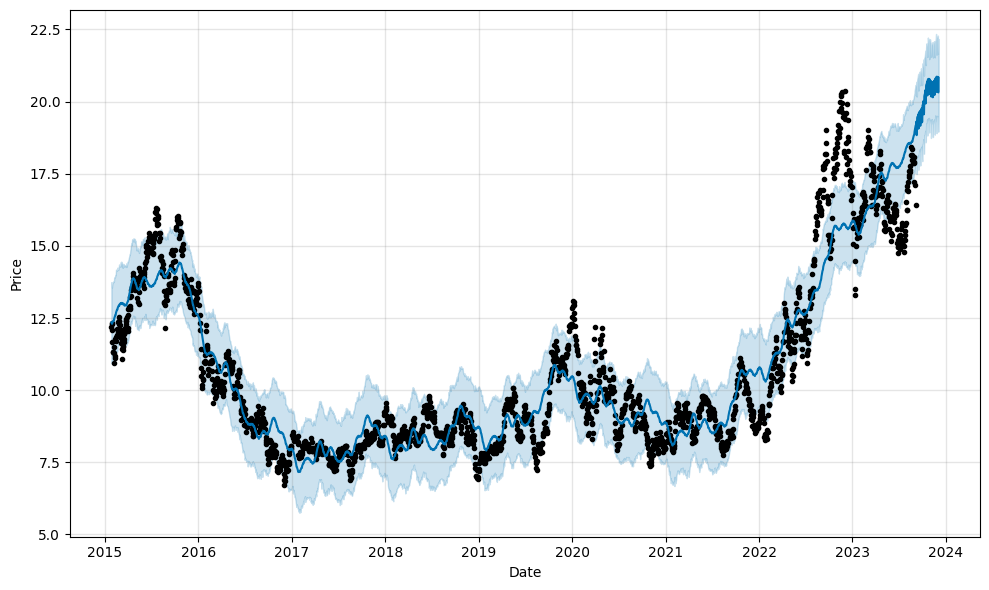

In [16]:
# plot the forecast data using prophets plot function
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

## Downloading the Forecast data

To delve deeper into our forecasted data, we'll conduct some additional analyses and visualizations. This includes filtering the forecast data, joining it with the original data, and visualizing the forecast with the addition of some common technical indicators, like the 10-day and 50-day simple moving averages (SMA).

In [18]:
# Saving the DataFrame as a CSV file
data.to_csv("data.csv")
forecast.to_csv("forecast.csv")

In [20]:
# copying the forecast data to a new DataFrame
forecast_copy = forecast.copy()

In [21]:
# adding new columns to the DataFrame for charting 
forecast_copy = forecast_copy[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_copy

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-26,12.345305,10.935308,13.742807
1,2015-01-27,12.333720,10.988384,13.664756
2,2015-01-28,12.302190,10.986718,13.559071
3,2015-01-29,12.303347,10.957123,13.645307
4,2015-01-30,12.343070,10.990866,13.701017
...,...,...,...,...
2253,2023-11-30,20.825320,19.489549,22.226791
2254,2023-12-01,20.852111,19.430434,22.286918
2255,2023-12-02,20.327446,18.956573,21.780913
2256,2023-12-03,20.316597,18.966047,21.657155


In [22]:
# making a copy of the original data 
data_copy = data.copy()
data_copy

,Date,Close
0,2015-01-26,12.200000
1,2015-01-27,12.320000
2,2015-01-28,12.100000
3,2015-01-29,12.300000
4,2015-01-30,11.670000
...,...,...
2163,2023-08-29,18.080000
2164,2023-08-30,17.860001
2165,2023-08-31,17.219999
2166,2023-09-01,17.110001


In [23]:
#  drop the date column
data_copy = data_copy.drop(['Date'], axis=1)
data_copy

,Close
0,12.200000
1,12.320000
2,12.100000
3,12.300000
4,11.670000
...,...
2163,18.080000
2164,17.860001
2165,17.219999
2166,17.110001


In [24]:
# merging the two DataFrames
forecast_copy = pd.concat([data_copy, forecast_copy], axis=1)
forecast_copy

,Close,ds,yhat,yhat_lower,yhat_upper
0,12.20,2015-01-26,12.345305,10.935308,13.742807
1,12.32,2015-01-27,12.333720,10.988384,13.664756
2,12.10,2015-01-28,12.302190,10.986718,13.559071
3,12.30,2015-01-29,12.303347,10.957123,13.645307
4,11.67,2015-01-30,12.343070,10.990866,13.701017
...,...,...,...,...,...
2253,NaN,2023-11-30,20.825320,19.489549,22.226791
2254,NaN,2023-12-01,20.852111,19.430434,22.286918
2255,NaN,2023-12-02,20.327446,18.956573,21.780913
2256,NaN,2023-12-03,20.316597,18.966047,21.657155


In [25]:
#  add the 10 sma and 50 sma to the plot. Base the 10 and 50 sma off the predicted prices (y hat)

# 10 sma
forecast_copy['10sma'] = forecast_copy['yhat'].rolling(window=10).mean()

# 50 sma
forecast_copy['50sma'] = forecast_copy['yhat'].rolling(window=50).mean()

forecast_copy

,Close,ds,yhat,yhat_lower,yhat_upper,10sma,50sma
0,12.20,2015-01-26,12.345305,10.935308,13.742807,NaN,NaN
1,12.32,2015-01-27,12.333720,10.988384,13.664756,NaN,NaN
2,12.10,2015-01-28,12.302190,10.986718,13.559071,NaN,NaN
3,12.30,2015-01-29,12.303347,10.957123,13.645307,NaN,NaN
4,11.67,2015-01-30,12.343070,10.990866,13.701017,NaN,NaN
...,...,...,...,...,...,...,...
2253,NaN,2023-11-30,20.825320,19.489549,22.226791,20.726182,20.561788
2254,NaN,2023-12-01,20.852111,19.430434,22.286918,20.731878,20.572658
2255,NaN,2023-12-02,20.327446,18.956573,21.780913,20.686554,20.571292
2256,NaN,2023-12-03,20.316597,18.966047,21.657155,20.638888,20.578977


In [26]:
# extract the last 25% of the data
half_data = forecast_copy.iloc[len(data)//4:]

fig = px.line(half_data, x=half_data['ds'], y=['Close', 'yhat_upper', 'yhat','yhat_lower', '10sma', '50sma'],
              labels={'value': 'Price', 'variable': 'Price Type'},
              title=f'{ticker} Close and Predicted Prices with SMA')

fig.update_traces(line=dict(width=2))
fig.update_layout(legend_title_text='Legend')

fig.show()


## Conclusion

In this notebook, we used Facebook's Prophet library to forecast stock prices based on historical data fetched from Yahoo Finance. After data preparation and visualization, we trained the Prophet model and generated a forecast for the next 90 days. We also explored how to incorporate simple moving averages into our visualizations to provide additional context for potential trends.

For those interested in stock market analysis, Prophet offers a powerful and relatively simple tool to generate forecasts. However, it's essential to remember that stock markets are influenced by a multitude of factors, and no model can guarantee future performance. Always use forecasts as one of many tools in your analytical toolkit and ensure you understand the limitations and assumptions behind any model you use.
